In [1]:
# Análisis e IA
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Visualización
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from wordcloud import WordCloud, STOPWORDS

In [3]:
train_df = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\general_dfs\sarcasm train-balanced.csv')

# Df analisis

In [4]:
train_df.columns

Index(['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs',
       'date', 'created_utc', 'parent_comment'],
      dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
label             1010826 non-null int64
comment           1010773 non-null object
author            1010826 non-null object
subreddit         1010826 non-null object
score             1010826 non-null int64
ups               1010826 non-null int64
downs             1010826 non-null int64
date              1010826 non-null object
created_utc       1010826 non-null object
parent_comment    1010826 non-null object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [6]:
train_df.isnull().any()

label             False
comment            True
author            False
subreddit         False
score             False
ups               False
downs             False
date              False
created_utc       False
parent_comment    False
dtype: bool

In [7]:
train_df.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

Hay muy pocos NaN. Voy a eliminarlos, porque no me merece la pena pelearme por tan poca cosa

In [8]:
train_df['comment'] = train_df['comment'].dropna()

In [9]:
train_df['comment'].isnull().sum()

53

In [10]:
train_df.head(2)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...


In [11]:
train_df['label'].value_counts()

1    505413
0    505413
Name: label, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(train_df['comment'], train_df['label'], random_state=17)

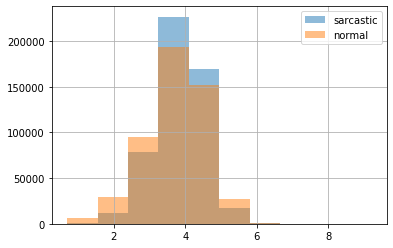

In [13]:
train_df.loc[train_df['label'] == 1, 'comment'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
train_df.loc[train_df['label'] == 0, 'comment'].str.len().apply(np.log1p).hist(label='normal', alpha=.5)
plt.legend()
plt.show()

Este gráfico permite apreciar la diferencia entre los comentarios sarcásticos y los normales. Debajo, tars elliminar las STOPWORDS, quedan las palabras más recurrentes.

In [14]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

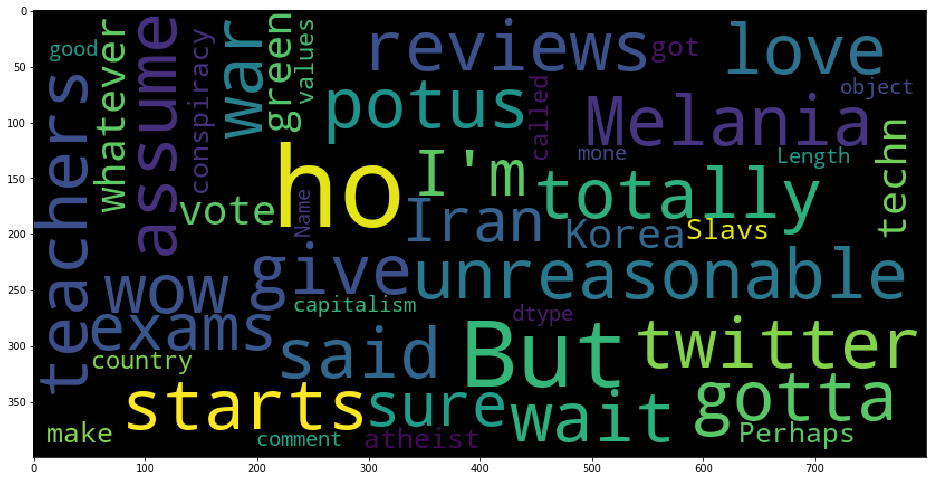

In [15]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'comment']))
plt.imshow(wordcloud)
plt.show()

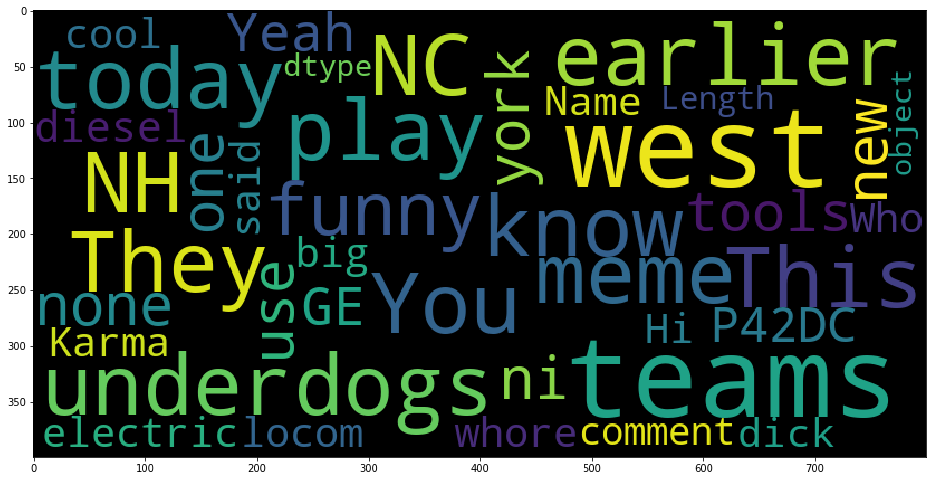

In [16]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 0, 'comment']))
plt.imshow(wordcloud);

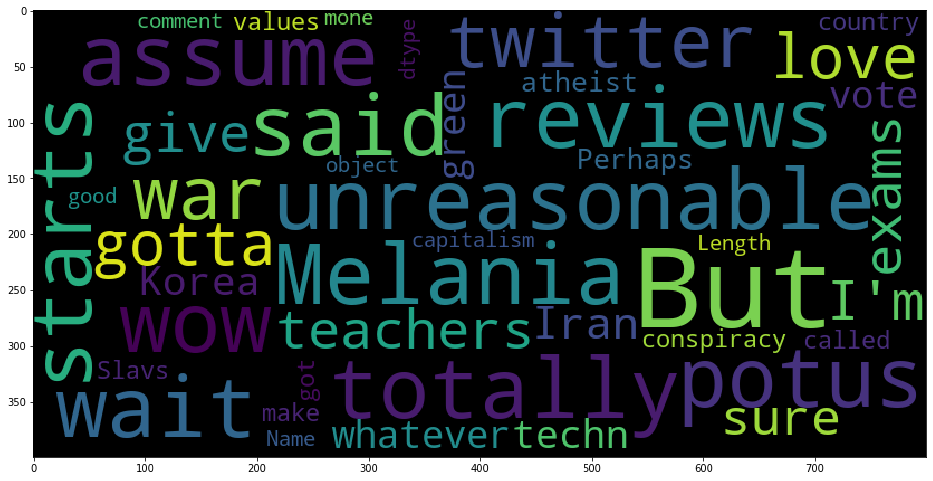

In [17]:
STOPWORDS.add("ho")
plt.figure(figsize=(16, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'comment']))
plt.imshow(wordcloud);

Yo no habría añadido "ho" a las STOPWORDS. Con el código de abajo, obetenemos los diferentes forums del df y el tamaño, media y suma de los comentarios contenidos.

In [18]:
sub_df = train_df.groupby('subreddit')['label'].agg([np.size, np.mean, np.sum])
sub_df.sort_values(by='sum', ascending=False).head(10)

,size,mean,sum
subreddit,,,
AskReddit,65677,0.401465,26367
politics,39496,0.605378,23910
worldnews,26377,0.642529,16948
leagueoflegends,21037,0.542330,11409
pcmasterrace,18988,0.566674,10760
news,16891,0.603457,10193
funny,17939,0.451474,8099
pics,16154,0.484400,7825
todayilearned,14161,0.547560,7754


In [19]:
sub_df[sub_df['size'] > 1000].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
subreddit,,,
creepyPMs,5466,0.784303,4287
MensRights,3356,0.680870,2285
ShitRedditSays,1284,0.661994,850
worldnews,26377,0.642529,16948
Libertarian,2562,0.640125,1640
atheism,7377,0.639555,4718
Conservative,1881,0.639553,1203
TwoXChromosomes,1560,0.632692,987
fatlogic,2356,0.623090,1468
